## <span style="color:blue">Problem Set 9</span>

<Enter your name here>

### <font color="blue">Overview</font>
In this problem set, you will create an interactive service that provides movie information to the user.  You will make use of a free REST API from the Open Movie Database (described here: http://www.omdbapi.com).  To access the API, you will need an API key (token) that is used to authenticate your requests to the OMDb REST API.
  
#### <font color="blue">Get an OMDb API key</font>
To acquire a key, do the following:
- Navigate to http://www.omdbapi.com/apikey.aspx 
- Click on FREE to acquire a free key.
- Complete the form filling in your email address (use your WCC address), name, and the usage description.
- After completing the form, click Submit.
- An email will be sent to the address entered in the form.  Follow the instructions in the email.
- Once you secure the API key, overwrite the placeholder in the cell below

#### <font color="blue">Run the cell below</font>
By running this cell, all the items in that cell are loaded into the address space making them available for use in later cells.  Do not duplicate any of the code below in later cells.

In [1]:
import requests
import json
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

# use mathplotlib to display an image file
def showImage(movie,file):
    image = mpimg.imread("poster.jpg")
    plt.title(movie)
    plt.imshow(image)
    plt.show()
    return

# Name of file use in later problems
PREVIOUSLY_VIEWED_FNAME = 'viewed_movies.txt'

# Overwrite the placeholder with your key.  Use this variable in your function below.
OMDB_API_KEY = 'http://www.omdbapi.com/?i=tt3896198&apikey=e7a6fdb2'

### <font color="blue">Problem 1</font>
Define a function _getOMDBData_ that is passed the parameter _title_ and calls the OMDB API to get the data about a movie.  See the expected output below for an example of the data returned. 

The API requires two parameters to retrieve and return movie information:  _"apikey"_, the key acquire from OMDB, and _"t"_, the movie title.  While you have the liberty to code the API call in any fashion, the snippet below is a suggested format where _title_ is the parameter passed to the function and _OMDB_API_KEY_ is the variable containing the acquired API key.

    pars = {'t':title,'apikey':OMDB_API_KEY}
    response = requests.get('http://www.omdbapi.com/', params=pars)

#### Do the following:
The function _getOMDBData_ accepts the parameter _title_ and uses _try/except_ syntax to accomplish the following:
1. Uses the _requests.get_ method with the required parameters to retrieve information associated with the movie described by _title_. 
2.  Stores the data returned as json into the variable _omdbData_.
3.  If the request is unsuccessful (the _Response_ key of the _omdbData_ has a string value equal to "False") return a boolean_False_ to the calling environment.  
4.  Otherwise return the _variable_.
5. If the _try_ fails, return _False_ to the caller. 

There are two types of errors that can result from a REST API call.  First, an http/https error may occur when the service could not be reached for any reason.  There are many reasons that could cause this error including a invalid or malformed url or loss of connection. You must use _try/except_ to trap this error.  In this case, the function must return a boolean _False_.  Feel free to code additional error handling provided that _False_ is returned.   

The second type of error results from the API returning an error condition,e.g., an unknown move title.  This error is indicated by the string _"False"_ value associated with the key _"Response"_.  in this case, the function returns a boolean _False_ to the caller.  

Also, when the request is successful, return all movie information to the caller.  Do not edit the json in any fashion.

You must have only one instance of this function present in the notebook. DO not duplicated it in later cells.

In [33]:
import requests

def getOMDBData(title):
    OMDB_API_KEY = 'e7a6fdb2'
    pars = {'t': title, 'apikey': OMDB_API_KEY}
    
    try:
        response = requests.get('http://www.omdbapi.com/', params=pars)
        response.raise_for_status()
        omdbData = response.json()
        
        if omdbData.get("Response") == "False":
            return False
        return omdbData
    
    except requests.exceptions.RequestException:
        return False

In [34]:
# run this cell to test the valid movie title case
getOMDBData('Black Panther')

{'Title': 'Black Panther',
 'Year': '2018',
 'Rated': 'PG-13',
 'Released': '16 Feb 2018',
 'Runtime': '134 min',
 'Genre': 'Action, Adventure, Sci-Fi',
 'Director': 'Ryan Coogler',
 'Writer': 'Ryan Coogler, Joe Robert Cole, Stan Lee',
 'Actors': "Chadwick Boseman, Michael B. Jordan, Lupita Nyong'o",
 'Plot': "T'Challa, heir to the hidden but advanced kingdom of Wakanda, must step forward to lead his people into a new future and must confront a challenger from his country's past.",
 'Language': 'English, Swahili, Nama, Xhosa, Korean',
 'Country': 'United States',
 'Awards': 'Won 3 Oscars. 124 wins & 290 nominations total',
 'Poster': 'https://m.media-amazon.com/images/M/MV5BMTg1MTY2MjYzNV5BMl5BanBnXkFtZTgwMTc4NTMwNDI@._V1_SX300.jpg',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '7.3/10'},
  {'Source': 'Rotten Tomatoes', 'Value': '96%'},
  {'Source': 'Metacritic', 'Value': '88/100'}],
 'Metascore': '88',
 'imdbRating': '7.3',
 'imdbVotes': '852,821',
 'imdbID': 'tt1825683

In [ ]:
# Are these subject to change?  I could not figure out how to get the DVD release date to show and also couldn't figure out why
# box office numbers would change, or all the other stuff but did fact check it and it did match with "Black Panther." 

The output below is truncated to save space.
<div class="alert alert-warning">
    <font face="verdana" size="2" color="033971"><strong>Expected Output:</strong><br />
{'Actors': "Chadwick Boseman, Michael B. Jordan, Lupita Nyong'o, Danai Gurira",<br />
 'Awards': '14 nominations.',<br />
 'BoxOffice': '$501,105,037',<br />
 'Country': 'USA, South Africa, South Korea, Australia',<br />
 'DVD': '15 May 2018',<br />
 'Director': 'Ryan Coogler',<br />
 'Genre': 'Action, Adventure, Sci-Fi',<br />
 'Language': 'Swahili, Nama, English, Xhosa, Korean',<br />
 ...</div>

In [22]:
# run this cell to test the invalid movie title case
getOMDBData("asdfasdfasdfasdfasdf")

False

<div class="alert alert-warning">
    <font face="verdana" size="2" color="033971"><strong>Expected Output:</strong><br />
False</div>

### <font color="blue">Problem 2:</font> 
Define the function _getMoviesData_ that accepts the parameter _movieTitles_, which is a list of movie titles, calls _getOMDBData_ for each title, builds a list of json returned by _getOMDBData_, and returns that list to the calling environment. The function must handle both the case of valid movie data returned, which is appended to the list, and a _False_ return value, which is skipped,i.e., not appended to the list.

This function does the following:
1. Iterate over _movieTitles_.
2. If getOMBDData returns _False_ , do not append information to the _list_.
3. Otherwise append the movie information to the _list_.
4. Return the _list_.

In [37]:
def getMoviesData(movieTitles):
    movies_data = []
    for title in movieTitles:
        movie_info = getOMDBData(title)
        if movie_info:
            movies_data.append(movie_info)
    return movies_data

In [38]:
# Run this cell to test the function
for movie in getMoviesData(["Superbabies: Baby Geniuses 2", 
                  "The Shawshank Redemption", 
                  "Foobarbat",
                  "asdfasdfasdfasdfasdf" , 
                  "Thor"]):
    print(movie['Title'],movie['Year'])

Superbabies: Baby Geniuses 2 2004
The Shawshank Redemption 1994
Thor 2011


<div class="alert alert-warning">
    <font face="verdana" size="2" color="033971"><strong>Expected Output:</strong><br />
Superbabies: Baby Geniuses 2 2004<br/>
The Shawshank Redemption 1994<br/>
Thor 2011</div>

### <font color="blue">Problem 3:</font> 
Define a function _sortedMoviesData_ that accepts a list of movie titles, calls _getMoviesData_ and sorts the json returned in descending order on the _imdbRating_.  The sorted list is returned to the calling environment.

Note: The value associated with the _"imdbRating"_ key is a string which must be converted to a float.  

The optimized solution uses the sorted function and a lambda expression.

In [41]:
# complete the function
def sortedMoviesData(movieTitles):
    movies_data = getMoviesData(movieTitles)
    sorted_data = sorted(movies_data, key=lambda movie: float(movie['imdbRating']), reverse=True)
    return sorted_data

Complete the code below that uses the _sortedMoviesData_ function to produce the expected output shown.

In [58]:
result = sortedMoviesData(["Gladiator", 
            "The Shawshank Redemption", 
                         "Source Code",
                       "Black Panther",
               "asdfasdfasdfasdfasdf" , 
                                "Clue",
                         "Extraction"])
# write code below to produce the expected output
print("     {0:30} {1:4} {2:4}".format('Movie','Year','Rating'))
print("     {0:30} {1:4} {2:4}".format('-----','----','------'))
for movie in result:
    print("     {0:30} {1:4}   {2:4}".format(movie['Title'],movie['Year'],movie['imdbRating']))

     Movie                          Year Rating
     -----                          ---- ------
     The Shawshank Redemption       1994   9.3 
     Gladiator                      2000   8.5 
     Source Code                    2011   7.5 
     Black Panther                  2018   7.3 
     Clue                           1985   7.3 
     Extraction                     2020   6.8 


<div class="alert alert-warning">
    <font face="verdana" size="2" color="033971"><strong>Expected Output:</strong><br />
The table below is intended to provide a sense of the appearance of the output and the column alignment.  There is no need to attempt any additional formatting.        
</div>  

### <font color="blue">PROBLEM 4:</font>
The next few problems require the use of a file that tracks the movies that the user has viewed. The name of the file is contained in the variable _PREVIOUSLY_VIEWED_FNAME_ initialized in the first cell. 

Write a function called _loadViewedMovies_ that attempts to open the file.  The first time this code is executed, the file does not exist resulting in a failure to open the file.  Later problems will create and populate the file. In the case of an exception when attempting to open the file, the function will return an empty list.  In the case of a successful read, the function returns the contents of the file after they converted to json.

 The function does the following:
1. Open the file using the name in _PREVIOUSLY_VIEWED_FNAME_.
2. If the file opens successfully:
   1. Read the contents of the file.
   2. Converts the contents to json into the variable _viewed_movies_.
3. Otherwise:
   1. Assign an empty list to _viewed_movies_.
4. Return the variable _viewed_movies_.

Notes:
- Use try/except when opening the file.
- The contents of PREVIOUSLY_VIEWED_FNAME is json list of movie titles
- As you write code for later problems, you may corrupt the file.  In that case, delete the file and rerun this cell.

In [57]:
import json

PREVIOUSLY_VIEWED_FNAME = 'viewed_movies.json'
def loadViewedMovies():
    try:
        with open(PREVIOUSLY_VIEWED_FNAME, 'r') as file:
            viewed_movies = json.load(file)
    except (FileNotFoundError, json.JSONDecodeError):
        viewed_movies = []
    return viewed_movies

In [55]:
# Run this to test the above code.  
viewed_movies = loadViewedMovies()
print(viewed_movies)

[]


The first time the above cell is run, an empty list should display.  If the file identified by _PREVIOUSLY_VIEWED_FNAME_ is not empty, it's contents will display.
<div class="alert alert-warning">
    <font face="verdana" size="2" color="033971"><strong>Expected Output:</strong><br />
[]<br />
</span>

### <font color="blue">PROBLEM 5:</font>
Define a function *markAsViewed* that accepts a movie title, checks if the title is present in the list _viewed_movies_. If the title is present in the list, do nothing.  Otherwise, add the title to _viewed_movies_ and writes the _viewed_movies_ to the file.

Do the following:
1. If that title IS in viewed_movies, do nothing.
2. If that title IS NOT in viewed_movies.
    - Add the title to the list viewed_movies.
    - Open the file
    - Write the entire contents of viewed_movies to the file PREVIOUSLY_VIEWED_FNAME as a json-formatted string.
    - Close the file.
3. return nothing.


In [67]:
import json

PREVIOUSLY_VIEWED_FNAME = 'viewed_movies.json'

def markAsViewed(title):
    viewed_movies = loadViewedMovies()
    
    if title not in viewed_movies:
        viewed_movies.append(title)
        
        # Updated list
        with open(PREVIOUSLY_VIEWED_FNAME, 'w') as file:
            json.dump(viewed_movies, file)

In [68]:
# Run this cell to test maskAsViewed
markAsViewed("It's a Beautiful Life")
markAsViewed("Black Panther")
markAsViewed("Thor")
# confirm that the viewed_movies list was written to the file correctly
viewed_movies = loadViewedMovies()
print(viewed_movies)

["It's a Beautiful Life", 'Black Panther', 'Thor']


If the file viewed_movies.txt file was empty before you ran this cell, the expected output is shown below.<br />
<div class="alert alert-warning">
    <font face="verdana" size="2" color="033971"><strong>Expected Output:</strong><br />
["It's a Beautiful Life", 'Black Panther', 'Thor']</div>

### <font color="blue">PROBLEM 6:</font>
Define a function *getMovieAdvice* that does the following:

1. Ask the user for a list of movie titles separated by commas
2. Convert the user input to a list of titles.
2. Call the _sortedMoviesData_ function (defined earlier) on that list of titles.
3. Iterate over the list returned by _sortedMoviesData_.
   1. If the user has already watched the movie, print "You have already watched {title}"
   2. Otherwise print the title, year, rating, and plot in the format:

          {title} ({year}): {rating}
          --------------------
          {plot}

   3. Ask the user if they want to watch the movie (yes or no)
      1. If the user types "no" (or anything other than yes) do nothing.
      2. Otherwise call markAsViewed and print the runtime in the format:
          Watched {title} for {runtime}
4. return nothing

In [72]:
# complete the function
def getMovieAdvice():
    # Ask user for movie titles
    user_input = input("Enter some movies separated by commas: ")
    # Convert input string to a list of titles
    movie_titles = [title.strip() for title in user_input.split(',')]
    
    # Get sorted movie data
    sorted_movies = sortedMoviesData(movie_titles)
    
    for movie in sorted_movies:
        title = movie['Title']
        year = movie['Year']
        rating = movie['imdbRating']
        plot = movie['Plot']
        
        # Check if the user has already watched the movie
        viewed_movies = loadViewedMovies()
        if title in viewed_movies:
            print(f"You have already watched {title}")
        else:
            # Print movie details
            print(f"{title} ({year}): {rating}")
            print("--------------------")
            print(plot)
            
            # Ask if the user wants to watch the movie
            watch_response = input("Want to watch this movie? (yes or no): ")
            if watch_response.lower() == "yes":
                markAsViewed(title)
                runtime = movie.get('Runtime', 'unknown')  # Use 'unknown' if runtime not available
                print(f"Watched {title} for {runtime}")

# Run this cell to test the function getMovieAdvice
getMovieAdvice()


Enter some movies separated by commas:  Troy, Friday, Free Willy


Troy (2004): 7.3
--------------------
An adaptation of Homer's great epic, the film follows the assault on Troy by the united Greek forces.


Want to watch this movie? (yes or no):  Yes


Watched Troy for 163 min
Friday (1995): 7.2
--------------------
It's Friday, and Craig and Smokey must come up with $200 they owe a local bully or there won't be a Saturday.


Want to watch this movie? (yes or no):  Yes


Watched Friday for 91 min
Free Willy (1993): 6.0
--------------------
When a boy learns that a beloved killer whale is to be killed by the aquarium owners, the boy risks everything to free the whale.


Want to watch this movie? (yes or no):  I have already watched this title.


In [76]:
# Run this cell to test the function getMovieAdvice
getMovieAdvice()


Enter some movies separated by commas:  greyhound


Greyhound (2020): 7.0
--------------------
Several months after the U.S. entry into World War II, an inexperienced U.S. Navy commander must lead an Allied convoy being stalked by a German submarine wolf pack.


Want to watch this movie? (yes or no):  no


<div class="alert alert-warning">
    <font face="verdana" size="2" color="033971"><strong>Expected Output:</strong><br />
Enter some movies separated by commas: Thor,Greyhound<br />
<br />
You have already seen Thor<br />
<br />
Greyhound (2020): 7.0<br />
----------------------------<br />
Several months after the U.S. entry into World War II, an inexperienced U.S. Navy commander must lead an Allied convoy being stalked by a German submarine wolf pack.<br />
<br />
        Want to watch this movie? (yes or no):</div>

### <font color="blue">PROBLEM 7:</font>
One of the elements in the json returned by the OMDB API is a link to the movie poster image.  This link is found in the element identifed by the key _"Poster"_.  Use this link to retrieve the image and display it using the function _showImage_ which was defined in the first cell.

Do the following:
1. Iterate over the _movies_ list defined below.
2. Call getOMDBData using the movie title and store the result into a _variable_.
3. Using the _variable_, retrieve the value associated with the key "Poster" and store it in the variable _link_.
4. Print _link_.
5. Call _requests.get_ using _link_ to retrieve the image into the variable _poster_.  Use try/except to handle an http/https errors. You have the freedom to handle http/https errors in any fashion. 
6. Open a file called _poster.jpg_ using the mode "wb" (write binary).
7. The image for the poster is in the response (from requests) attribute content. Write content to the file.
8. close the file.
9. call _showImage_ passing the movie title and the file name _poster.jpg_.

https://m.media-amazon.com/images/M/MV5BMDAyY2FhYjctNDc5OS00MDNlLThiMGUtY2UxYWVkNGY2ZjljXkEyXkFqcGc@._V1_SX300.jpg


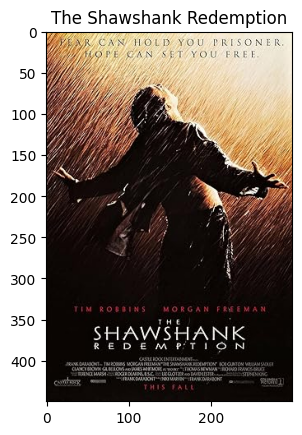

https://m.media-amazon.com/images/M/MV5BYWQ4YmNjYjEtOWE1Zi00Y2U4LWI4NTAtMTU0MjkxNWQ1ZmJiXkEyXkFqcGc@._V1_SX300.jpg


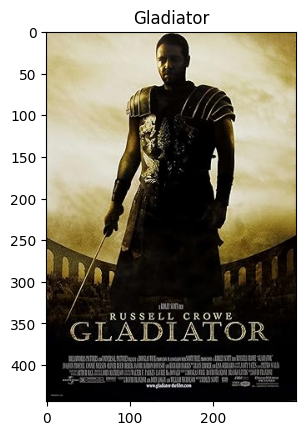

No data found for asdfasdfasdfasdfasdf.
https://m.media-amazon.com/images/M/MV5BMTY0MTc3MzMzNV5BMl5BanBnXkFtZTcwNDE4MjE0NA@@._V1_SX300.jpg


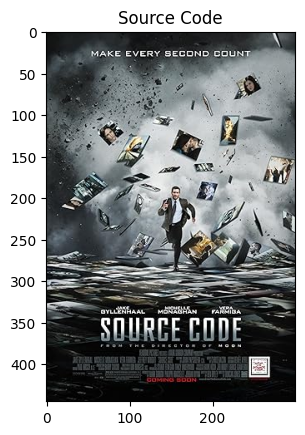

In [78]:
import requests
movies = ["The Shawshank Redemption","Gladiator","asdfasdfasdfasdfasdf","Source Code"]
for title in movies:
    movie_data = getOMDBData(title)
    if movie_data:
        link = movie_data.get("Poster")
        print(link)
        try:
            poster = requests.get(link)
            poster.raise_for_status() 
            with open("poster.jpg", "wb") as file:
                file.write(poster.content)

            # Display the image
            showImage(title, "poster.jpg")
        except requests.exceptions.RequestException as e:
            print(f"An error occurred while retrieving the image for {title}: {e}")
    else:
        print(f"No data found for {title}.")

For the sake of simplicity, the image is not shown in the expected output below.  However, if you coded the problem correctly, the link and the image associated with the link will appear,
<div class="alert alert-warning">
    <font face="verdana" size="2" color="033971"><strong>Expected Output:</strong><br />
https://m.media-amazon.com/images/M/MV5BMTY0MTc3MzMzNV5BMl5BanBnXkFtZTcwNDE4MjE0NA@@._V1_SX300.jpg<br />
        <span style="font-style: italic">An image should display here.</span>
        </div>        

### <font color="blue">PROBLEM 8:</font>
Another element in the json returned by the OMDB API is total revenue that the movie generated.  The element key is called "BoxOffice".  

This problem is composed of two parts.  The first part is to write a function called _getBoxOffice_ that is passed a movie title, calls _getOMDBData_ and handles three possible cases of the return value:
1. The return value is False because the title could not be found.  In this case, return -1.
2. The return value contains valid movie information and the value associated with the key _"BoxOffice"_ can be successfully converted to an integer, return that integer.
3. The return value contains valid movie information and the value associated with the key _"BoxOffice"_ cannot be successfully converted to an integer, return 0.  Note, _try/except_ is helpful in this case.

The second part is to write code that iterates over the titles in the list _movies_ below, calls _GetBoxOffice_ for each movie title, displays the title and revenue, and uses and accumulation pattern to total of the revenue. Print as shown in expected output.  For the case where the function returns -1, print "invalid", when 0 is returned print "N/A"

In [95]:
def getBoxOffice(title):
    movie_data = getOMDBData(title)
    
    if movie_data is False:
        return -1
    
    box_office = movie_data.get("BoxOffice", "N/A")
    
    if box_office == "N/A":
        return 0
    
    return box_office

movies = ["The Batman", "The Northman", "abcx", "Death on the Nile", 'Queen of the Nile']

total_revenue = 0

for title in movies:
    revenue = getBoxOffice(title)
    if revenue == -1:
        print(f"{title}: invalid")
    elif revenue == 0:
        print(f"{title}: N/A")
    else:
        print(f"{title}: {revenue}")
        try:
            total_revenue += int(revenue.replace('$', '').replace(',', '').strip())
        except ValueError:
            continue

print(f"Total Revenue: ${total_revenue:,.2f}")

The Batman: $369,345,583
The Northman: $34,233,110
abcx: invalid
Death on the Nile: $45,630,104
Queen of the Nile: N/A
Total Revenue: $449,208,797.00


<div class="alert alert-warning">
    <font face="verdana" size="2" color="033971"><strong>Expected Output:</strong><br />
Is shown below. 
        </div>


### <font color="blue">PROBLEM 9:</font>
One of the features of the OMDB API is the ability to search for movies using a keyword.  The API searches a number of elements for the keyword and returns json, which, when converted, is a dictionary composed of one element with a key of _"Search"_.  The value associated with that key is a list of dictionaries where each dictionary contains information for a movie.  The content of that dictionary is similar, but not identical, to that returned by _getOMDBData_.

This problem is composed of two parts.  First, write a function called _searchOMDBData_ that is passed the parameter _word_.  The function is almost identical to getOMDBData.  The only difference is replacing the API parameter _'t'_ with the parameter _'s'_.  The value associated with _'s'_ is the content of _word_.

The second part does the following:
1. Calls _searchOMDBData_ with the parameter _keyword_ below. 
2. Print the headers for the table as shown below.
3. Iterate over the list associated with the key "Search" in the content returned by the function.
4. Prints the year and title in a formatted table fashion as shown in expected output.

In [88]:
import requests

OMDB_API_KEY = 'e7a6fdb2'

def searchOMDBData(word):
    try:
        pars = {'s': word, 'apikey': OMDB_API_KEY}
        response = requests.get('http://www.omdbapi.com/', params=pars)
        omdbData = response.json()
        
        if omdbData.get("Response") == "False":
            return None
        
        return omdbData.get("Search", [])
        
    except Exception as e:
        return None

keyword = 'Nile'
movies_data = searchOMDBData(keyword)

if movies_data is not None:
    print(f"{'Year':<10} {'Title'}")
    print('-' * 30)
    
    for movie in movies_data:
        print(f"{movie['Year']:<10} {movie['Title']}")
else:
    print("No movies found or an error occurred.")



Year       Title
------------------------------
2022       Death on the Nile
1985       The Jewel of the Nile
1978       Death on the Nile
2017       The Nile Hilton Incident
1987       Daughter of the Nile
2019       Our Lady of the Nile
1955       Storm Over the Nile
1961       Queen of the Nile
2015       Walking the Nile
1954       Princess of the Nile


<div class="alert alert-warning">
    <font face="verdana" size="2" color="033971"><strong>Expected Output:</strong><br />
Is shown below.
        </div>

### <font color="blue">Problem 10</font>
Use the functions _searchOMDBData_ and _getBoxOffice_ to produce the output shown in expected output.

In [100]:
def getBoxOffice(title):
    movie_data = getOMDBData(title)
    if movie_data is False:
        return -1
    try:
        box_office = movie_data['BoxOffice']
        if box_office in ['N/A', '']:
            return 0
        return int(box_office.replace('$', '').replace(',', ''))
    except (ValueError, KeyError):
        return 0

In [108]:
keyword = 'Lord'
movies_data = searchOMDBData(keyword)

print(f"{'Year':<10} {'Title':<60} {'Revenue'}")
print(f"{'-' * 10:<10} {'-' * 60:<60} {'-' * 7}")

if movies_data is not None:
    for movie in movies_data:
        title = movie['Title']
        year = movie['Year']
        revenue = getBoxOffice(title)
# Does the - indicate it's presently being released? Why is there no revenue for the first series?
        if revenue == -1:
            revenue_str = "invalid"
        elif revenue == 0:
            revenue_str = "N/A"
        else:
            revenue_str = f"{revenue:,}"

        print(f"{year:<10} {title:<60} {revenue_str}")
else:
    print("No movies found or an error occurred.")

Year       Title                                                        Revenue
---------- ------------------------------------------------------------ -------
2001       The Lord of the Rings: The Fellowship of the Ring            319,372,078
2003       The Lord of the Rings: The Return of the King                381,878,219
2002       The Lord of the Rings: The Two Towers                        345,518,923
2022–      The Lord of the Rings: The Rings of Power                    N/A
2005       Lord of War                                                  24,149,632
1978       The Lord of the Rings                                        30,471,420
1990       Lord of the Flies                                            13,985,225
1984       Greystoke: The Legend of Tarzan, Lord of the Apes            45,858,563
1963       Lord of the Flies                                            13,985,225
1995       Lord of Illusions                                            13,294,422


<div class="alert alert-warning">
    <font face="verdana" size="2" color="033971"><strong>Expected Output:</strong><br />
Is shown below.
        </div>